In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pyodbc

In [24]:
#Live data extraction from DB
server = 'localhost'
database = 'AI_Banking'
username = 'SA'
password = 'Aspire@123'

# Create the connection string
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Establish the connection
    connection = pyodbc.connect(connection_string)
    print("Connection successful")

    # Create a SQL query
    query1 = 'SELECT * FROM CUSTOMER'
    query2 = 'SELECT * FROM ACCOUNT'
    query3 = 'SELECT * FROM TRANSACTIONS'

    df1 = pd.read_sql(query1, connection)
    df2 = pd.read_sql(query2, connection)
    df3 = pd.read_sql(query3, connection)
    customer_csv = 'customer_data.csv'
    account_csv = 'account_data.csv'
    transactions_csv = 'transactions_data.csv'
    df1.to_csv(customer_csv, index=False)
    df2.to_csv(account_csv, index=False)
    df3.to_csv(transactions_csv, index=False)
    

except pyodbc.Error as e:
    print("Error while connecting to SQL Server", e)

finally:
    # Close the connection
    if connection:
        connection.close()
        print("Connection closed")


Connection successful


C:\Users\bharath.venkatesan\AppData\Local\Temp\ipykernel_25136\113075658.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, connection)
C:\Users\bharath.venkatesan\AppData\Local\Temp\ipykernel_25136\113075658.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, connection)
C:\Users\bharath.venkatesan\AppData\Local\Temp\ipykernel_25136\113075658.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, connection)


Connection closed


In [25]:
customer_df=pd.DataFrame(pd.read_csv('customer_data.csv'))
account_df=pd.DataFrame(pd.read_csv('account_data.csv'))
transaction_df=pd.DataFrame(pd.read_csv('transactions_data.csv'))

In [26]:
print(transactions_df.describe().round(2))

       PRODUCT_ID  OPERATION_CODE  CURRENCY_AMOUNT       AMOUNT  MANAGER  \
count    91756.00        91756.00         91756.00     91756.00      0.0   
mean      5683.53         2986.42        100101.32    101183.96      NaN   
std        817.75         2172.44        693321.49    695218.67      NaN   
min       1001.00            1.00             0.09         0.01      NaN   
25%       6001.00          833.00           100.00       100.00      NaN   
50%       6003.00         5025.00          3000.00      3000.00      NaN   
75%       6003.00         5028.00         64000.00     68000.00      NaN   
max       6008.00         5045.00      50000000.00  50000000.00      NaN   

         ACCOUNT_ID     CUST_ID  EXTERNAL_ID  EXTERNAL_NAME  EXTERNAL_BIC  \
count  9.175600e+04    91756.00          0.0            0.0           0.0   
mean   1.046537e+10  1001914.06          NaN            NaN           NaN   
std    5.688524e+09     1704.17          NaN            NaN           NaN   
min    

In [12]:
additional_percentiles=[0.25,0.50,0.75,0.80, 0.85, 0.90, 0.95, 0.99,0.995,0.996,0.997,0.998,0.9999]
print(transaction_df['CURRENCY_AMOUNT'].describe(percentiles=additional_percentiles).round(2))

count        91756.00
mean        100101.32
std         693321.49
min              0.09
25%            100.00
50%           3000.00
75%          64000.00
80%         100000.00
85%         108441.98
90%         200000.00
95%         300000.00
99%        1480842.60
99.5%      1800000.00
99.6%      2500000.00
99.7%      3040000.00
99.8%      4872580.00
99.99%    22044274.59
max       50000000.00
Name: CURRENCY_AMOUNT, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


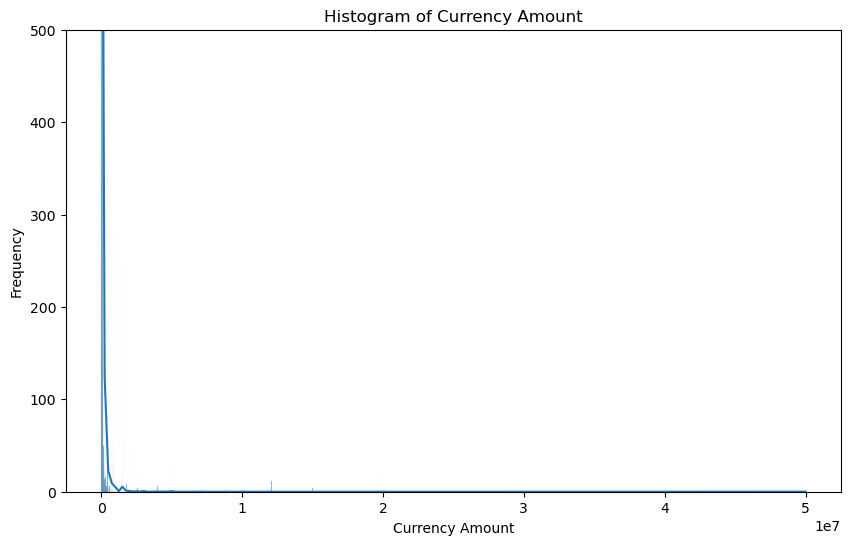

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(transaction_df['CURRENCY_AMOUNT'], kde=True)
plt.title('Histogram of Currency Amount' )
plt.xlabel('Currency Amount')
plt.ylabel('Frequency')
plt.ylim(0,500)
plt.show()

In [20]:
accounts=transaction_df['ACCOUNT_ID'].value_counts().reset_index()
accounts.columns=['Account_ID', 'Transactions_made']
print(accounts)

       Account_ID  Transactions_made
0     10000003347               7788
1     10000019379               6272
2     10000007288               3706
3     10000005938               3132
4     10000001908               2212
...           ...                ...
1333  10000003676                  2
1334  10000001118                  2
1335  10000000267                  2
1336  10000005555                  2
1337  10000004877                  2

[1338 rows x 2 columns]


In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(accounts['Account_ID'], accounts['Transactions_made'], bins=30, pthresh=.1, cmap='mako')
plt.title('Histogram of Currency Amount' )
plt.xlabel('Currency Amount')
plt.ylabel('Frequency')
#plt.ylim(0,500)
plt.show()

TypeError: histplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 1000x600 with 0 Axes>

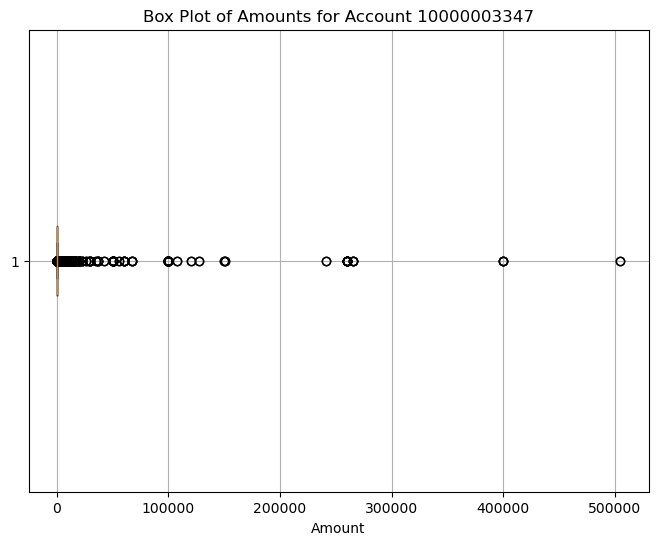

In [54]:
#tradf['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Filter and plot box plot
account_id = 10000003347
account_data = transaction_df[transaction_df['ACCOUNT_ID'] == account_id]['CURRENCY_AMOUNT']

plt.figure(figsize=(8, 6))
plt.boxplot(account_data, vert=False)
plt.title(f'Box Plot of Amounts for Account {account_id}')
plt.xlabel('Amount')
plt.grid(True)
plt.show()

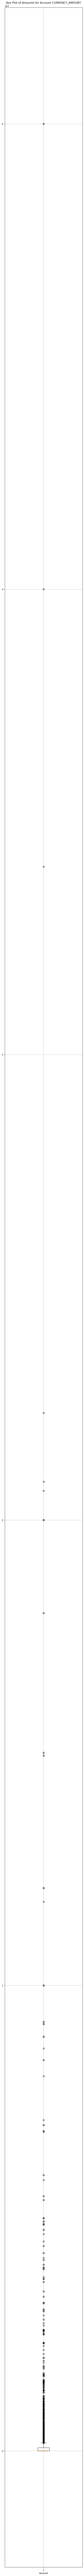

In [65]:
plt.figure(figsize=(6, 200))
plt.boxplot(transaction_df['AMOUNT'], vert=True)
plt.title('Box Plot of Amounts for Account CURRENCY_AMOUNT')
plt.xlabel('Amount')
plt.grid(True)
plt.show()

In [6]:
transaction_df = pd.read_csv('transaction_merged.csv')

In [34]:
additional_percentiles=[0.98]
#print(transaction_df['CURRENCY_AMOUNT'].describe(percentiles=additional_percentiles).round(2))
account_id = 10000000127

#print(transaction_df['CURRENCY_AMOUNT'].groupby('ACCOUNT_ID').describe(percentiles=additional_percentiles).round(2))
filtered_transactions = transaction_df[transaction_df['ACCOUNT_ID'] == 10000000127]
#amount_summary=transaction_df.groupby('ACCOUNT_ID')['CURRENCY_AMOUNT'].describe(percentiles=additional_percentiles).round(2)
amount_summary=filtered_transactions.describe(percentiles=additional_percentiles).round(2)
#percentile_90 = (amount_summary['99%'] & amount_summary['ACCOUNT_ID'] == account_id)
#percentile_90 = amount_summary(amount_summary['ACCOUNT_ID'] == account_id)
print(amount_summary['CURRENCY_AMOUNT'])

count         35.00
mean      151382.23
std       256026.56
min           49.42
50%        41781.34
98%       951200.00
max      1060000.00
Name: CURRENCY_AMOUNT, dtype: float64


In [72]:
additional_percentiles=[0.98]
account_id = 10000000127
amount_summary=transaction_df.groupby('ACCOUNT_ID')['CURRENCY_AMOUNT'].describe(percentiles=additional_percentiles).round(2)
print(amount_summary.loc[account_id, '98%'])

951200.0


In [76]:
for index, row in amount_summary.iterrows():
    additional_percentiles=[0.98]
    account_id = 10000000127
    amount_summary=transaction_df.groupby('ACCOUNT_ID')['CURRENCY_AMOUNT'].describe(percentiles=additional_percentiles).round(2)
    threshold = amount_summary.loc[account_id, '98%']
    for transaction_index, transaction_row in transaction_df.iterrows():
        if transaction_row['CURRENCY_AMOUNT'] > threshold and transaction_row['ACCOUNT_ID'] == index and transaction_row['RISK_LEVEL']>60:
            transaction_df['Fraud'] = 1
        else:
            transaction_df['FRAUD'] = 0


In [77]:
print(transaction_df['FRAUD'])

0        0
1        0
2        0
3        0
4        0
        ..
49856    0
49857    0
49858    0
49859    0
49860    0
Name: FRAUD, Length: 49861, dtype: int64


In [54]:
#for index, row in transaction_df.head(10).iterrows():
#    print(index)
print(transaction_df.iloc['10000000127','CURRENCY_AMOUNT'])    

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [24]:
transaction_test=transaction_df

In [25]:
transaction_test['FRAUD'] = ((transaction_test['CURRENCY_AMOUNT'] > 1480842.60) & (transaction_test['RISK_LEVEL'] >= 60)).astype(int)

In [33]:
fraud_count = transaction_test['FRAUD'].value_counts()
#print(fraud_count)
print(transaction_test.columns)

print(transaction_test[['CURRENCY_AMOUNT', 'RISK_LEVEL', 'DEBIT_CREDIT_FLAG', 'FISCAL_COUNTRY', 'FRAUD']])

Index(['ID', 'COMPANY', 'BRANCH', 'OPERATION_CORE_ID', 'PRODUCT_ID',
       'OPERATION_CODE', 'OPERATION_DATE', 'CURRENCY', 'CURRENCY_AMOUNT',
       'AMOUNT', 'ACCOUNT_ID', 'CUST_ID', 'DEBIT_CREDIT_FLAG',
       'TRANSACTION_REF', 'RISK_LEVEL', 'STATE', 'FISCAL_COUNTRY', 'OPEN_DATE',
       'ACCOUNT_CURRENCY', 'BALANCE', 'ACCOUNT_TYPE', 'PRODUCT_CODE', 'FRAUD'],
      dtype='object')
       CURRENCY_AMOUNT  RISK_LEVEL DEBIT_CREDIT_FLAG FISCAL_COUNTRY  FRAUD
0            200000.00          60                 C             CY      0
1              1993.01          82                 D             PR      0
2            100000.00         100                 D             KR      0
3            300000.00         100                 D             LT      0
4              1050.00         100                 D             KN      0
...                ...         ...               ...            ...    ...
49856        282339.18          82                 D             PR      0
49857       

In [46]:
model_data = transaction_test[['CURRENCY_AMOUNT', 'RISK_LEVEL', 'DEBIT_CREDIT_FLAG', 'FISCAL_COUNTRY', 'FRAUD']]

x=model_data[['CURRENCY_AMOUNT', 'RISK_LEVEL']]
y=model_data['FRAUD']

print(y.count)



<bound method Series.count of 0        0
1        0
2        0
3        0
4        0
        ..
49856    0
49857    0
49858    0
49859    0
49860    0
Name: FRAUD, Length: 49861, dtype: int32>


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(x_train,x_test)

fraud_prediction=knn.predict(x_test)

ValueError: Found input variables with inconsistent numbers of samples: [37395, 12466]

In [ ]:
accuracy = accuracy_score(y_test, fraud_prediction)
conf_matrix = confusion_matrix(y_test, fraud_prediction)
class_report = classification_report(y_test,fraud_prediction)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)